In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [ ]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


#  1. How many unique job titles are there? 

In [ ]:


unique_job_titles_count = df['job_title'].nunique()
print(f"The number of unique job titles is: {unique_job_titles_count}")


The number of unique job titles is: 93


# 2. What is the average salary (salary_in_usd) per work_year? 

In [ ]:

average_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean().round(2)
print("Average salary (USD) per work year:")
print(average_salary_per_year)

Average salary (USD) per work year:
work_year
2020     92302.63
2021     94087.21
2022    133379.51
2023    148954.56
Name: salary_in_usd, dtype: float64


#  3. Create a bar plot showing average salary by experience_level. (No For Loop for Labels) 

--- 3. Average Salary by Experience Level (Data for Plot) ---
Average salary (USD) by experience level:
experience_level
EX    194930.93
SE    153062.47
MI    104544.86
EN     78546.28
Name: salary_in_usd, dtype: float64


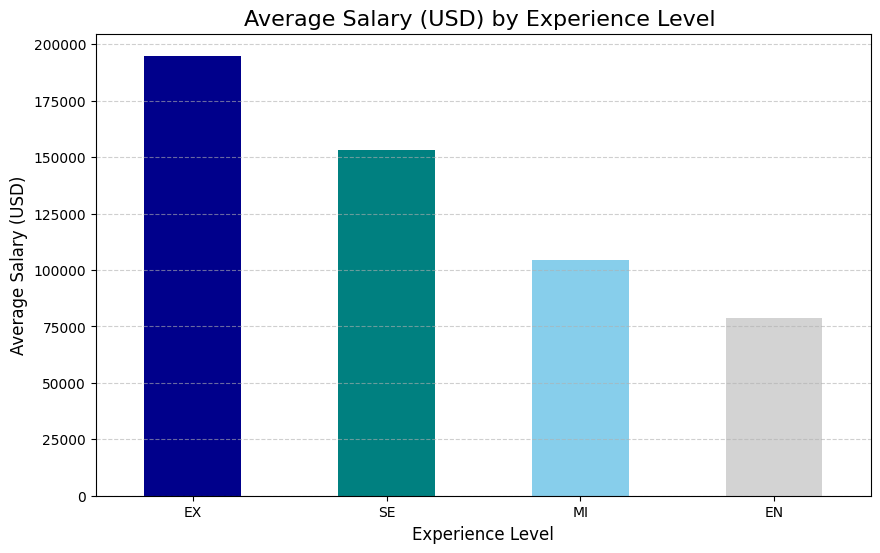

In [16]:


average_salary_by_level = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

print("--- 3. Average Salary by Experience Level (Data for Plot) ---")
print("Average salary (USD) by experience level:")
print(average_salary_by_level.round(2))

plt.figure(figsize=(10, 6))

ax = average_salary_by_level.plot(kind='bar', color=['darkblue', 'teal', 'skyblue', 'lightgray'])

plt.title('Average Salary (USD) by Experience Level ', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

In [20]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


In [21]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


In [22]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916




## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

# 1 : Salary does go up with more experience and over the years, so the model is pointed in the right direction.

# 2 : The model is missing key facts like location and job title, so it can't find the real pattern in salaries.

# 3 :You can make the model better by adding important missing facts like location and job title,

# 4 : $R^2$ only shows if the line fits the old dots, but it doesn't tell you the real dollar error or if the model will fail on new people.